# Featurization and Model Tuning Project

Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

Domain:

Cement manufacturing

Context:

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

Attribute Information:

Cement : measured in kg in a m3 mixture
Blast : measured in kg in a m3 mixture
Fly ash : measured in kg in a m3 mixture
Water : measured in kg in a m3 mixture
Superplasticizer : measured in kg in a m3 mixture
Coarse Aggregate : measured in kg in a m3 mixture
Fine Aggregate : measured in kg in a m3 mixture
Age : day (1~365)
Concrete compressive strength measured in MPa

Learning Outcomes:
Exploratory Data Analysis
Building ML models for regression
Hyper parameter tuning

Objective:
Modeling of strength of high performance concrete using Machine Learning

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
from sklearn.impute import SimpleImputer
import statistics
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load Data

dataframe = pd.read_csv("concrete.csv")
dataframe.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
conc = dataframe

In [4]:
conc.shape # Number of Rows & Colums respectively.

(1030, 9)

Univariate Analysis

In [5]:
conc.info() # Data Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
conc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
q1=conc.quantile(0.25)
q3=conc.quantile(0.75)
IQR=q3-q1
cwo=((conc.iloc[:] <(q1-1.5*IQR))|(conc.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=conc.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(conc),2)
opdf

,No. of Outliers,Percentage Outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B134A45C8>,
      dtype=object)

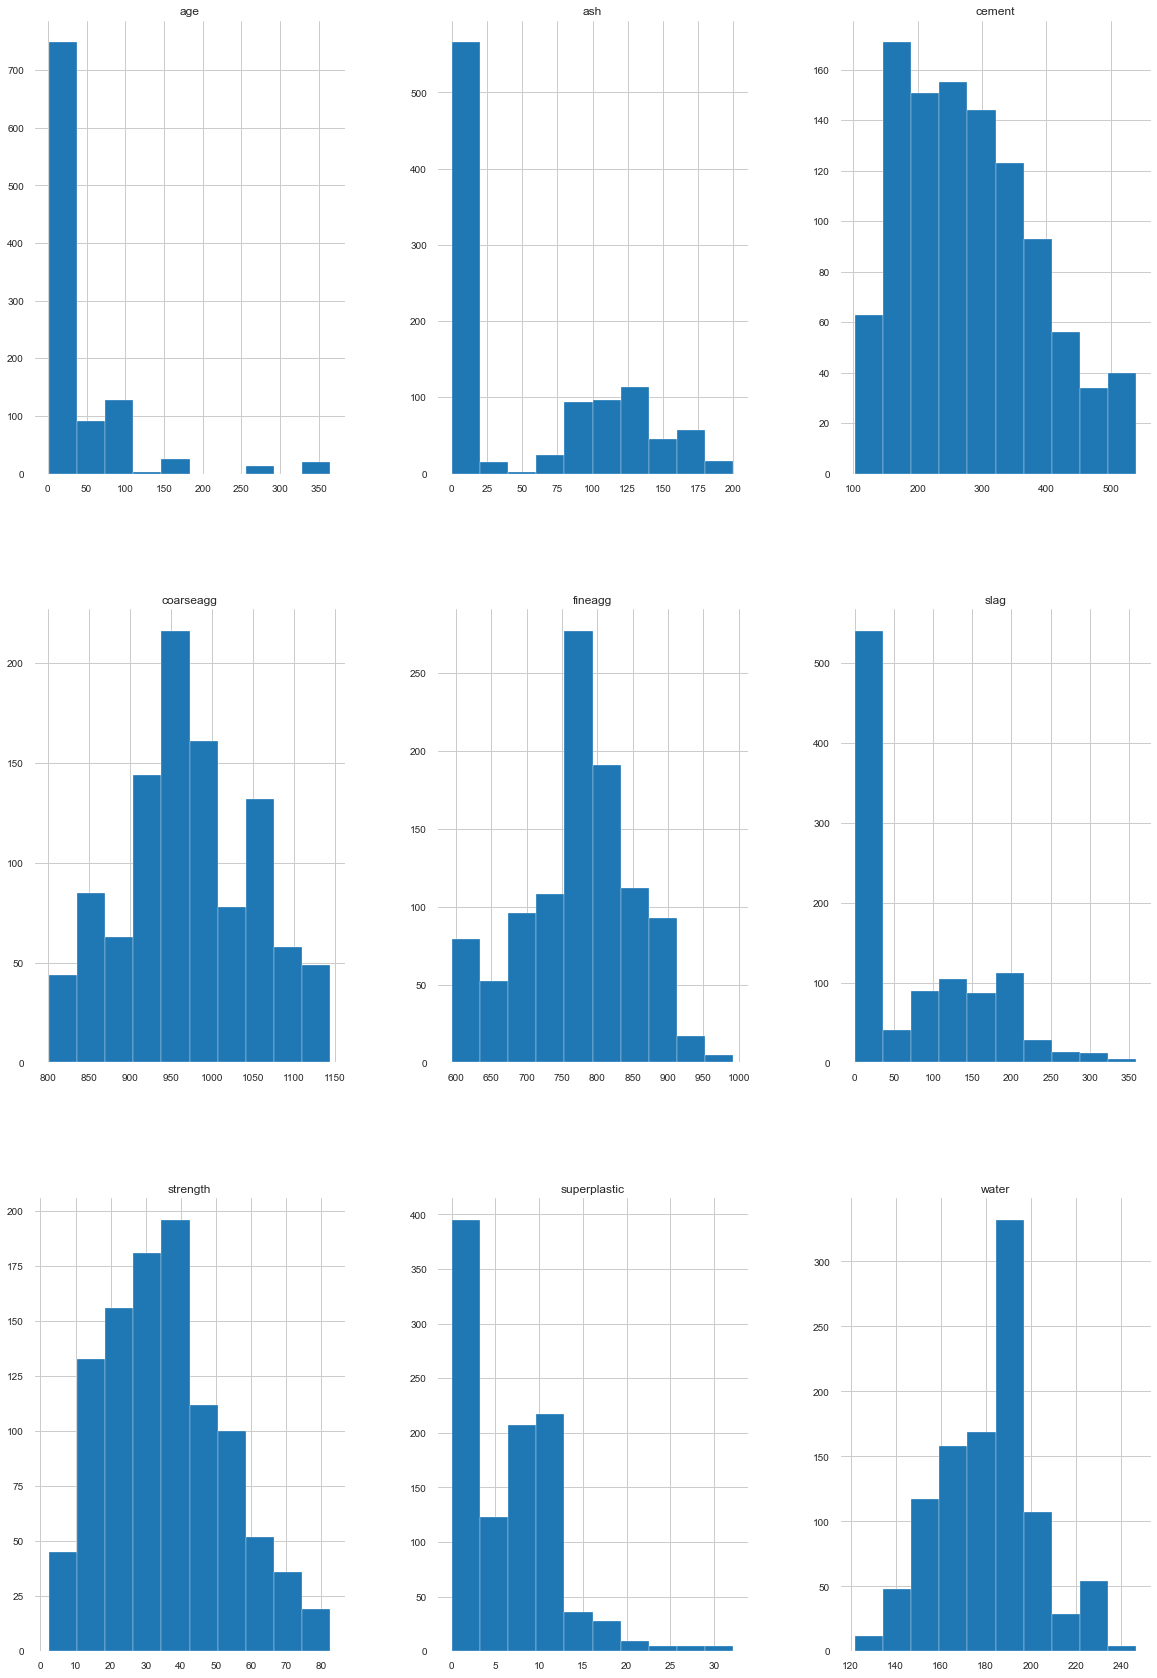

In [8]:
conc.hist(figsize=(20,30))
# Analysis of the body of distributions

Observation : Data has 0 values in attributes : slag, ash & superplastic, 0 value has been replaced with nan. 

In [9]:
conc['slag']=conc['slag'].replace(0, np.nan)
conc['ash']=conc['ash'].replace(0, np.nan)
conc['superplastic']=conc['superplastic'].replace(0, np.nan)

In [10]:
# Observation : Data has 0 values slag, ash & superplastic attributes, 0 value has been replaced with nan. 

conc.isnull().sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [11]:
# Total Number of missing value
conc.isnull().sum().sum()

1416

In [12]:
# Number of missing value in each attribute
total = conc.isnull().sum().sort_values(ascending=False)
percent = (conc.isnull().sum()/conc.isnull().count()).sort_values(ascending=False)
missing_conc = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_conc['Missing Percent'] = missing_conc['Missing Percent'].apply(lambda x: x * 100)
missing_conc.loc[missing_conc['Missing Percent'] > 10][:10]

,Total,Missing Percent
ash,566,54.951456
slag,471,45.728155
superplastic,379,36.796117


In [13]:
print("conc:",conc.median())

conc: cement          272.900
slag            135.700
ash             121.400
water           185.000
superplastic      9.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64


In [14]:
conc['slag'].median()

135.7

In [15]:
conc['ash'].median()

121.4

In [16]:
conc['superplastic'].median()

9.4

In [17]:
# Replacing nan value with median value.  

In [18]:
conc['slag']=conc['slag'].replace(0, np.nan)
conc['ash']=conc['ash'].replace(0, np.nan)
conc['superplastic']=conc['superplastic'].replace(0, np.nan)

In [19]:
conc1=conc

In [20]:
conc1.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,NaN,NaN,192.0,NaN,889.8,945.0,90,21.86
6,166.8,250.2,NaN,203.5,NaN,975.6,692.6,7,15.75
7,251.4,NaN,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,NaN,NaN,192.0,NaN,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [21]:
# Outliers
conc1.skew()

cement          0.509481
slag            0.178948
ash            -0.194270
water           0.074628
superplastic    1.777735
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [22]:
conc1['slag']=conc1['slag'].replace(np.nan, conc1['slag'].median())
conc1['ash']=conc1['ash'].replace(np.nan, conc1['ash'].median())
conc1['superplastic']=conc1['superplastic'].replace(np.nan, conc1['superplastic'].median())

In [23]:
q1=conc1.quantile(0.25)
q3=conc1.quantile(0.75)
IQR=q3-q1
cwo=((conc1.iloc[:] <(q1-1.5*IQR))|(conc1.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=conc1.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(conc1),2)
opdf


,No. of Outliers,Percentage Outliers
cement,0,0.00
slag,406,39.42
ash,459,44.56
water,9,0.87
superplastic,146,14.17
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


In [24]:
# Out layers are ignored.

In [25]:
# Multivariate analysis

In [26]:
conc1.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29


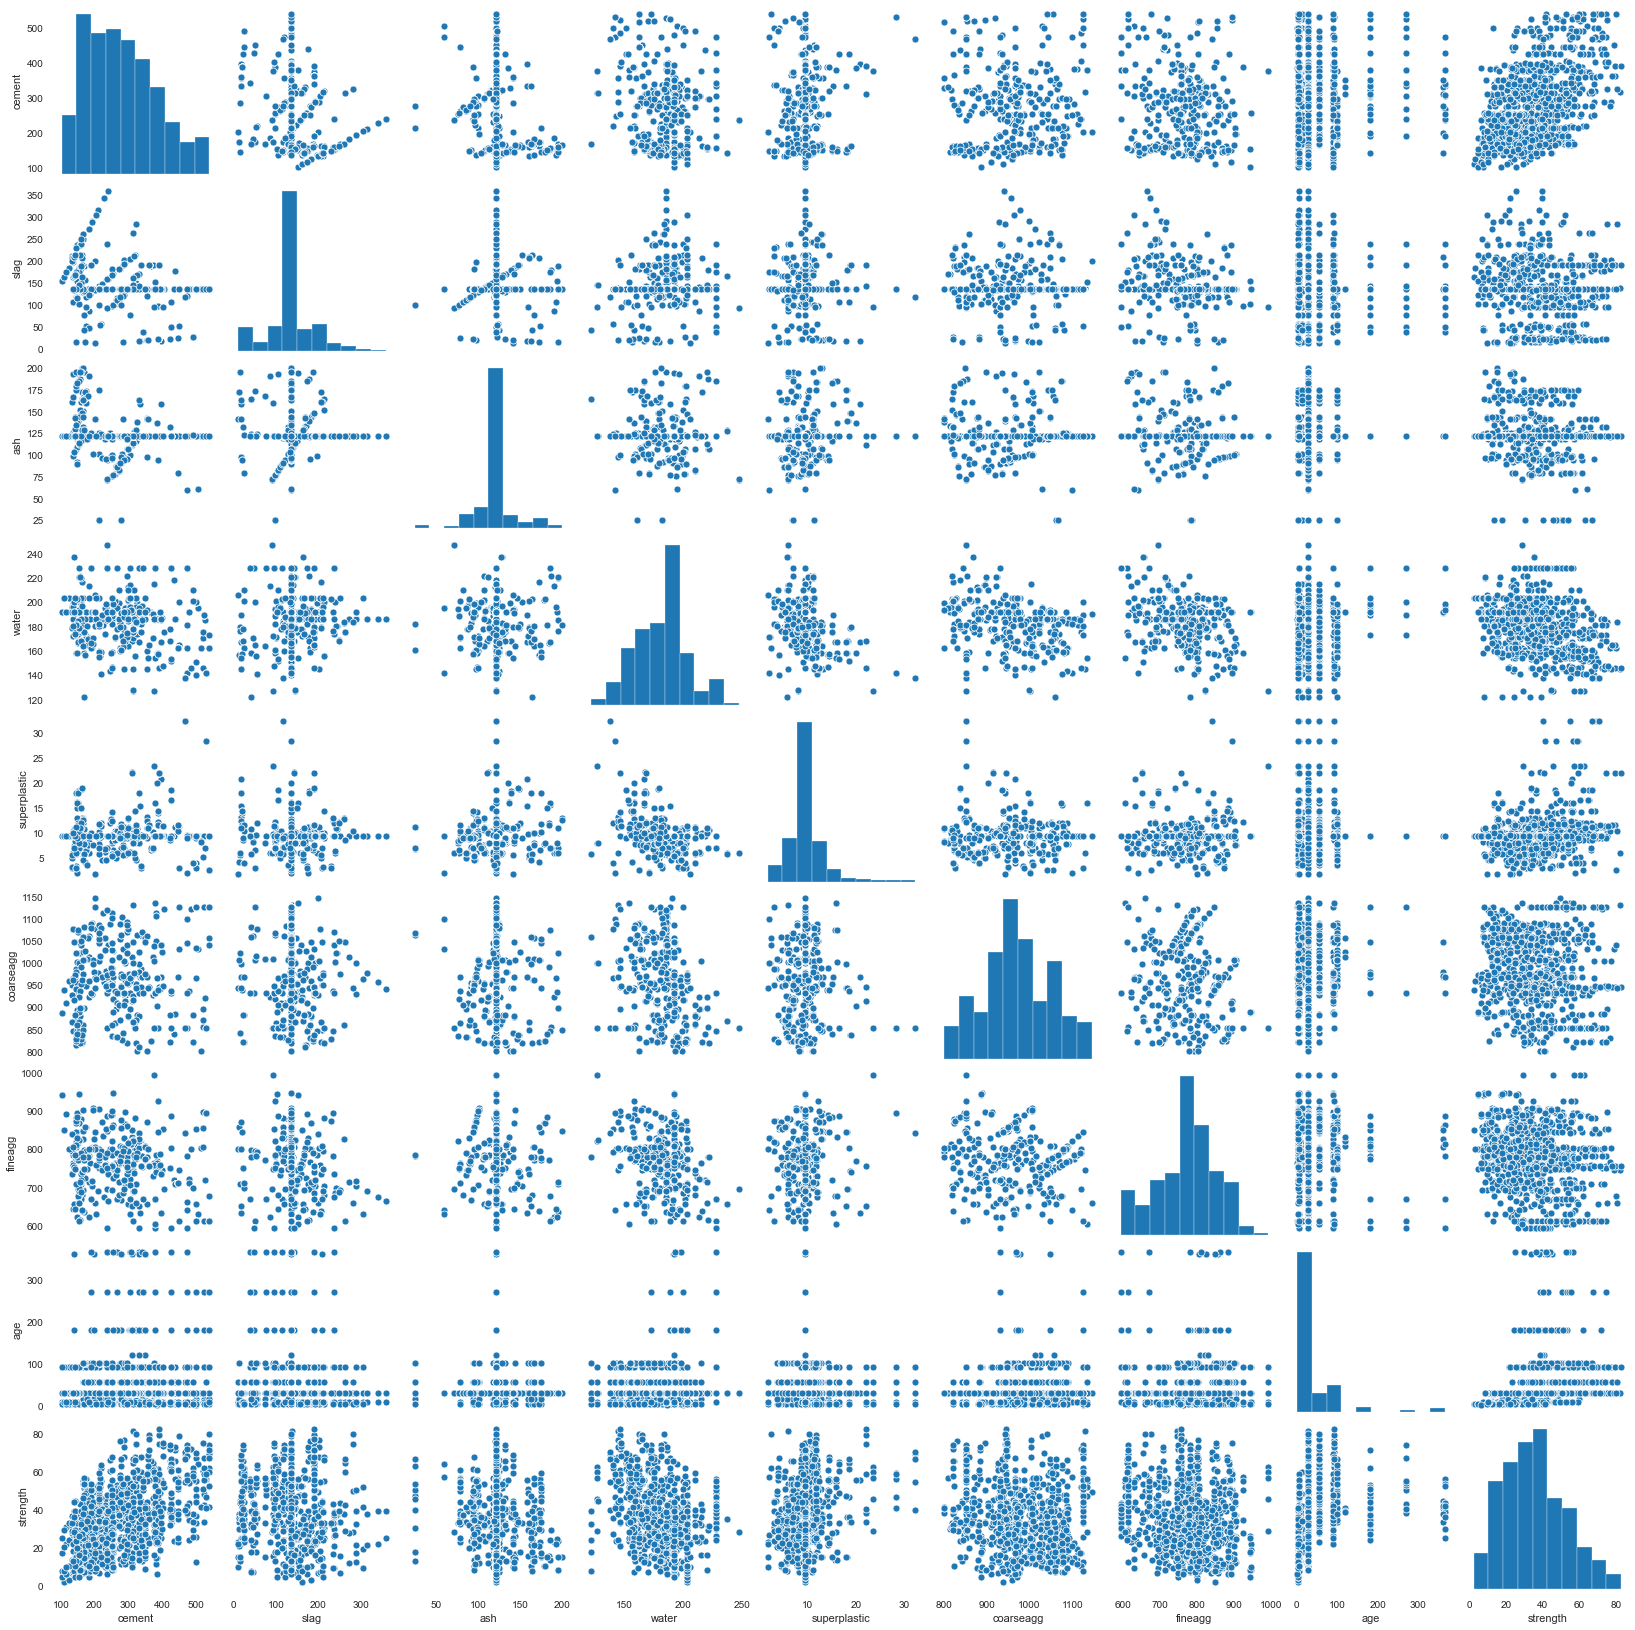

In [27]:
sns.pairplot(conc1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B17C81948>]],
      dtype=object)

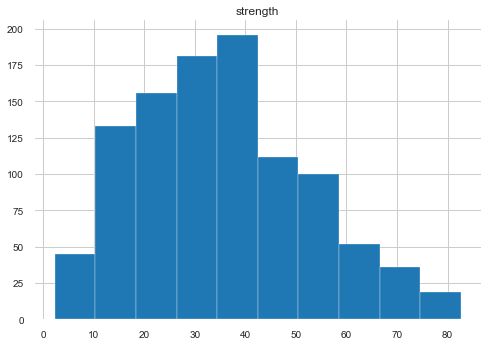

In [28]:
conc1.hist('strength')

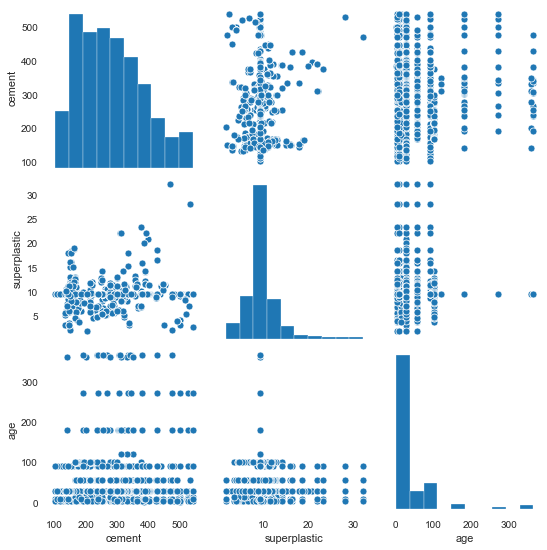

In [29]:
sns.pairplot(conc1, vars=["cement","superplastic","age"])

In [30]:
conc1.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,135.7,121.4,192.0,9.4,889.8,945.0,90,21.86
6,166.8,250.2,121.4,203.5,9.4,975.6,692.6,7,15.75
7,251.4,135.7,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,135.7,121.4,192.0,9.4,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [31]:
conc1.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [34]:
# Multivariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B19EB4B88>,
      dtype=object)

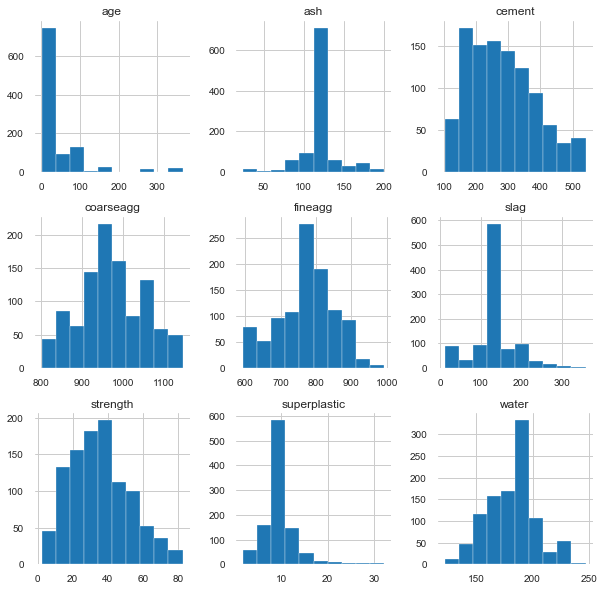

In [35]:
conc.hist(figsize=(10,10))

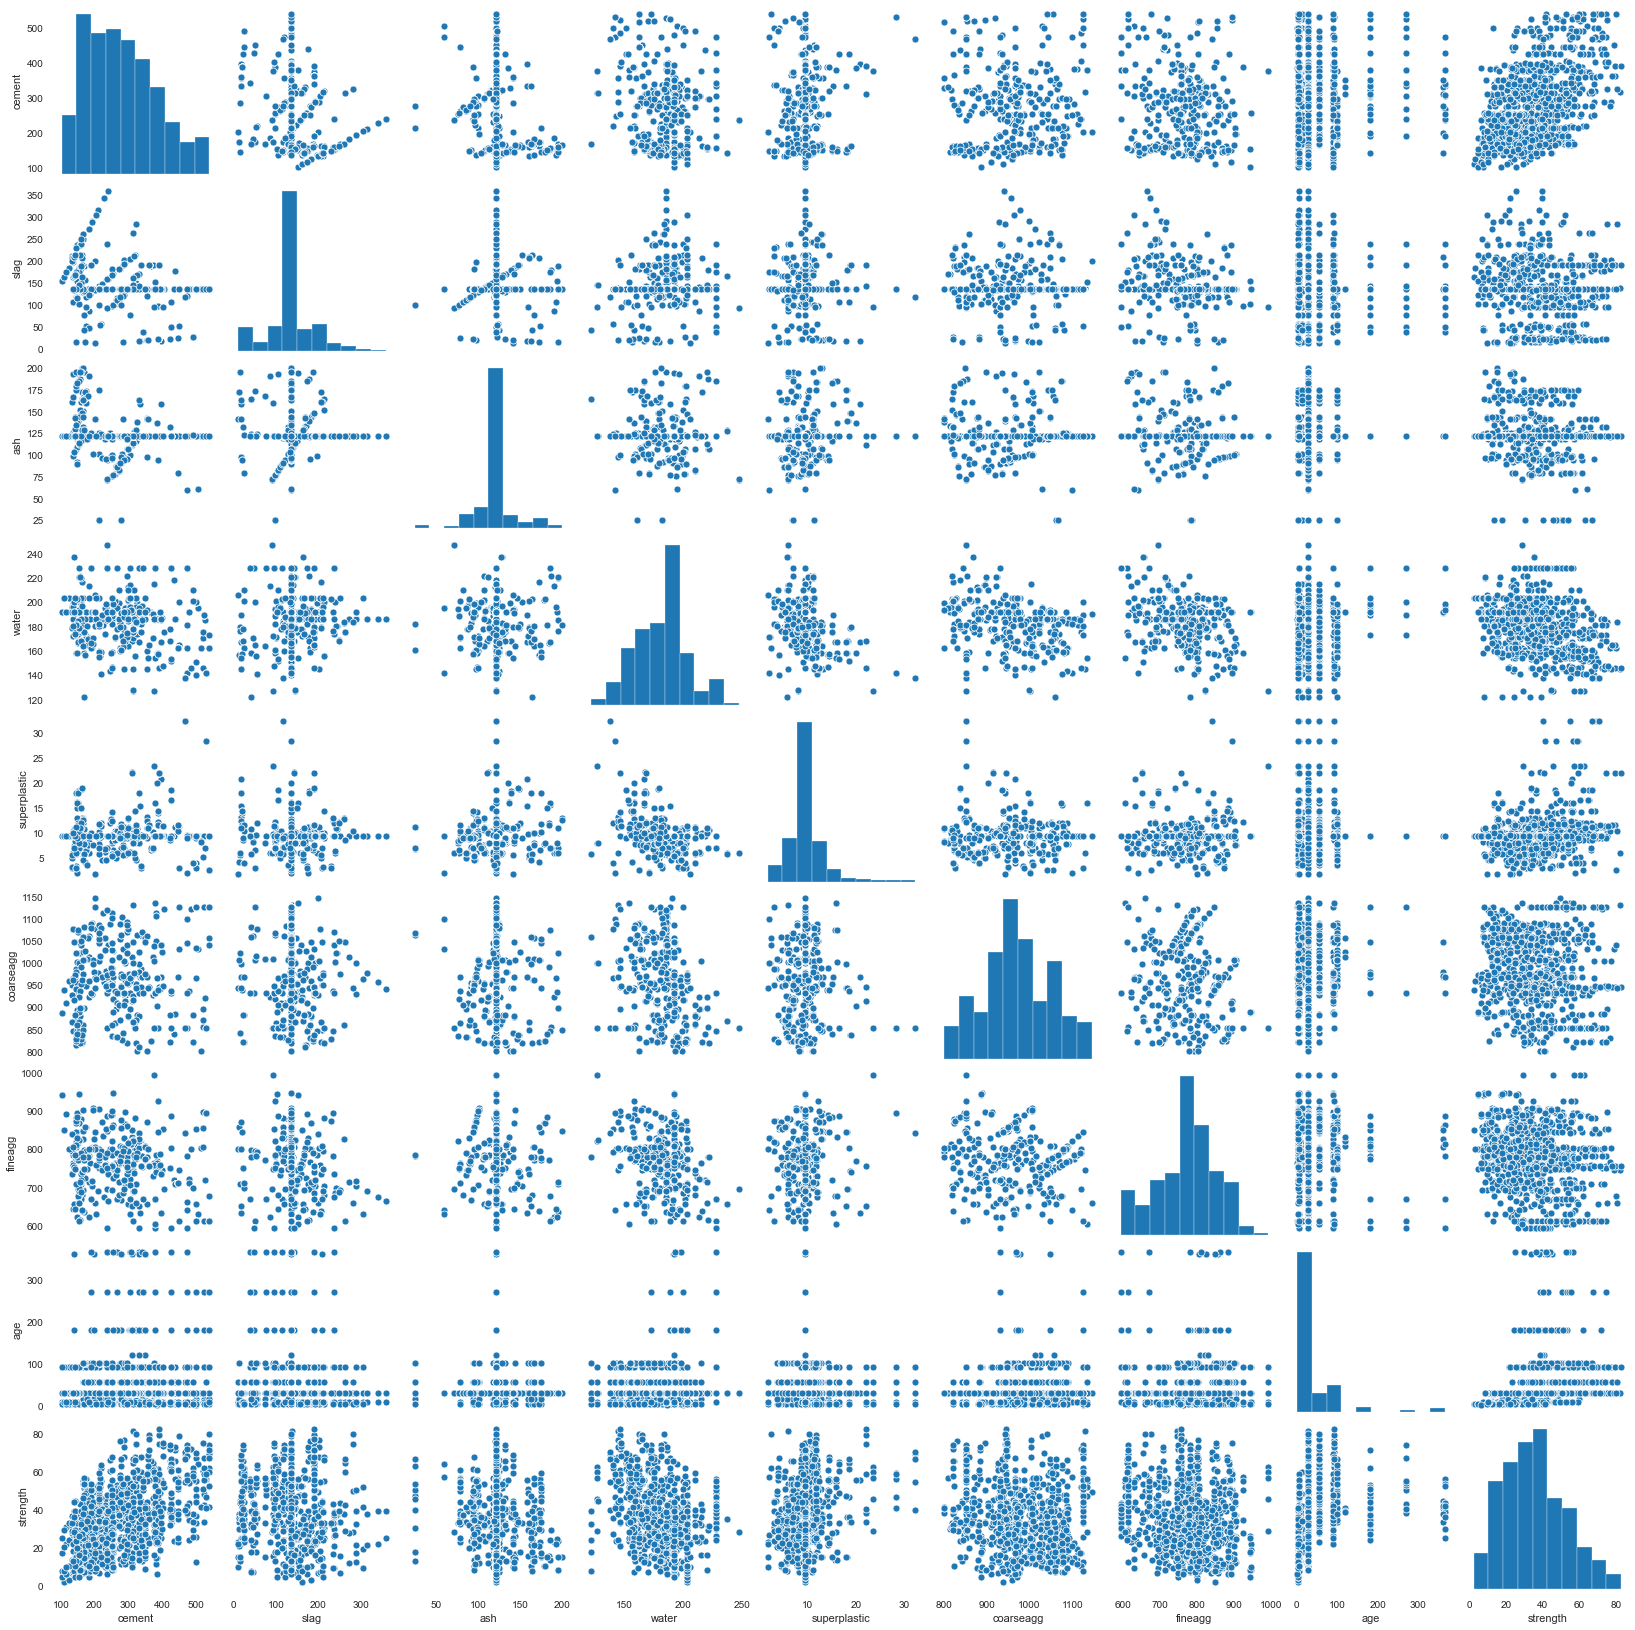

In [36]:
sns.pairplot(conc1)

In [37]:
conc1.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.257057,-0.196231,-0.081587,0.276856,-0.109349,-0.222718,0.081946,0.497832
slag,-0.257057,1.000000,0.046546,0.190766,0.021271,0.006770,-0.171175,-0.031405,-0.076045
ash,-0.196231,0.046546,1.000000,-0.029037,0.036498,-0.011546,-0.097634,0.001532,-0.130794
water,-0.081587,0.190766,-0.029037,1.000000,-0.420512,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.276856,0.021271,0.036498,-0.420512,1.000000,-0.177896,0.156046,-0.010325,0.241681
coarseagg,-0.109349,0.006770,-0.011546,-0.182294,-0.177896,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.171175,-0.097634,-0.450661,0.156046,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.031405,0.001532,0.277618,-0.010325,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,-0.076045,-0.130794,-0.289633,0.241681,-0.164935,-0.167241,0.328873,1.000000


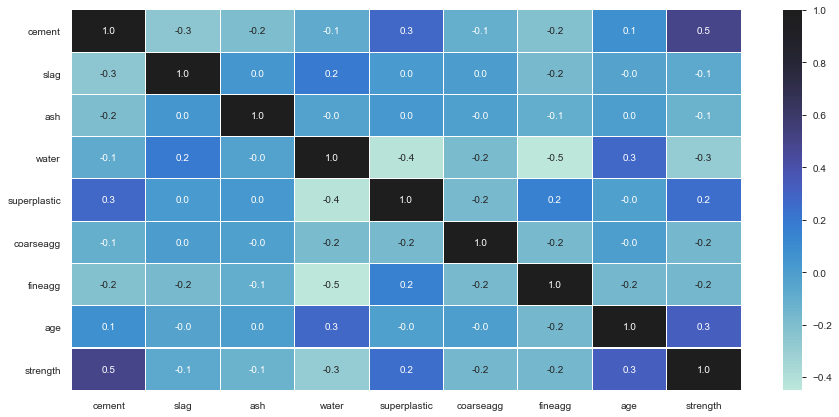

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(conc1.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [39]:
# Observation : 

In [40]:
#Feature Engineering, Model Building and Model Tuning

In [41]:
from scipy.stats import zscore

In [42]:
#Scaling the features
conc1_z= conc1.apply(zscore)
conc1_z=pd.DataFrame(conc1_z,columns=conc1.columns)

In [43]:
conc1_z.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.428083,0.022165,1.027590,-0.072306,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-1.760412,0.150570,-1.090116,0.311871,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.004674,-1.115770,0.273274,-1.142514,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,-0.412156,0.022165,2.175461,-0.072306,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,0.891033,0.022165,0.549700,-0.154630,0.958372,-0.959363,-0.279733,-1.049727
5,-0.250517,-0.004674,0.022165,0.488793,-0.072306,-1.069519,2.139079,0.702224,-0.835925
6,-1.094894,2.145400,0.022165,1.027590,-0.072306,0.034498,-1.010525,-0.612331,-1.201845
7,-0.284981,-0.004674,-0.115096,0.324811,-0.895543,0.713893,-0.198167,0.163731,0.049231
8,0.141995,-0.004674,0.022165,0.488793,-0.072306,1.442184,-0.107073,-0.279733,-0.848501
9,-1.207861,0.902300,0.978561,0.582497,-0.182071,-1.195619,-0.930662,-0.279733,-0.408918


In [44]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X=conc1_z.iloc[:,0:8]
y = conc1_z.iloc[:,8]

In [45]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.364424
slag          0.075967
ash           0.029942
water         0.110238
superplastic  0.018396
coarseagg     0.033032
fineagg       0.038884
age           0.329117


In [48]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9948592395522299
Performance on testing data using DT: 0.7672390778745641
Accuracy DT:  0.7672390778745641


C:\Users\mr810j\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


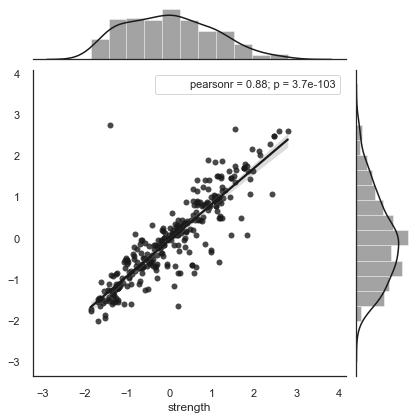

In [49]:


from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");



In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.767239


In [51]:
#K fold cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [52]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\mr810j\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.8655078638786313
Standard Deviation:  0.04775669211946201


In [118]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.740375
2,Decision Tree k fold,0.865829


Iteration 2

In [119]:
conc1_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


Drop the least significant variable

In [120]:
#Create a copy of the dataset
conc2_z=conc1_z.copy()

In [121]:
#independent and dependent variable
X = conc2_z.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = conc2_z['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [122]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [123]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.381395
slag          0.104189
water         0.141644
superplastic  0.041540
age           0.331231


In [124]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9944457721854881
Performance on testing data using DT: 0.8214686278180321
Accuracy DT:  0.8214686278180321


The acuracy on testing dataset is not improved, still it is an overfit model.

C:\Users\mr810j\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


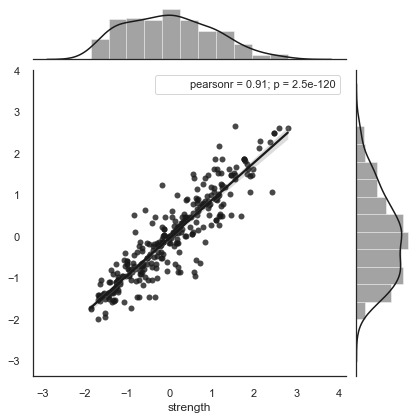

In [125]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [126]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.740375
2,Decision Tree k fold,0.865829
3,Decision Tree2,0.821469


Regularising/Pruning of Decision Tree

In [127]:
#independent and dependent variables
X=conc2_z.iloc[:,0:8]
y = conc2_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [128]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [129]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.421808
slag          0.021221
ash           0.009799
water         0.124655
superplastic  0.003183
coarseagg     0.010518
fineagg       0.007883
age           0.400933


Visualizing the Regularized Tree

In [130]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz
import pydot
bank_df=concrete_df_z
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [ ]:


y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))



In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

K fold cross validation

In [ ]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Iteration 2

Drop the least significant variable

In [ ]:
conc2_z.info()

In [ ]:
#Create a copy of the dataset
conc3=conc2_z.copy()

In [ ]:
#independent and dependent variable
X = conc3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = conc3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

In [ ]:


#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))



In [ ]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

The acuracy on testing dataset is not improved, still it is an overfit model.

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Regularising/Pruning of Decision Tree

In [ ]:
#independent and dependent variables
X=conc2_z.iloc[:,0:8]
y = conc2_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

In [ ]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

least significant variable :  ash,coarseagg and fineagg.

Visualizing the Regularized Tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz
import pydot
bank_df=concrete_df_z
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

In [ ]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [ ]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

K fold cross validation

In [ ]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:


#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results



Iteration2

In [ ]:
#Create a copy of the dataset
conc4=conc2_z.copy()

In [ ]:
#independent and dependent variable
X = conc4.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = conc4['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

In [ ]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

K Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(conc2_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

In [ ]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(conc2_z)

In [ ]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(conc2_z)
conc2_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
conc2_z_copy = conc2_z.copy(deep = True)

In [ ]:
centroids = cluster.cluster_centers_
centroids

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(conc) )
centroid_df

In [ ]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
conc2_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))